# Visualization of model metrics during training

This notebook accesses tensorboard log files that are saved during Lightning Pose network training and visualizes trainig metrics. \

Alternatively, we can visualize them in Tensorboard directly. 
In terminal, \
tensorboard --logdir /home/yiting/Documents/GitHub/lightning-pose/outputs/2024-08-07/15-24-31/ 

### Setup

In [3]:
# from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import os
import pandas as pd
from matplotlib import pyplot as plt 
from tbparse import SummaryReader
from collections import defaultdict


In [10]:
output_dir = r"/home/yiting/Documents/GitHub/lightning-pose/outputs"

# # Single model
model_dirs = [r"2026-01-01/00-01-03"]
model_names = ["260101"]
save_dir = r"/media/yiting/NewVolume/Litpose/model_eval/260101_000103"

# Pose PCA loss
# model_dirs = ["2024-08-12/18-04-44", "2024-08-09/15-12-36"]
# model_names = ["no_pose_pca", "pose_pca"]
# TCN
# model_dirs = ["2024-08-12/18-04-44", "2024-08-09/16-34-04"]
# model_names = ["no_TCN", "TCN"]
# save_dir = r"/home/yiting/Documents/LP_projects/model_eval/TCN"
# Temporal loss
# model_dirs = ["2024-08-08/15-34-52","2024-07-30/13-41-23", "2024-08-07/15-24-31", "2024-08-08/13-39-33"]
# # Supervised training
# model_dirs = ["2024-08-07/15-43-46", "2024-08-07/16-21-14"]
# Semi-supervised training
# model_dirs = ["2024-07-30/13-41-23", "2024-07-30/16-03-42"]
supervised_metrics = ["train_supervised_rmse", "val_supervised_rmse"]
unsupervised_metrics = ["train_temporal_loss_weighted", "train_pca_multiview_loss_weighted", "train_pca_multiview_loss",
                        "train_pca_singleview_loss_weighted", "train_pca_singleview_loss"]
total_metrics = ["total_loss"]


### Access tensorbard data 

In [7]:
model_dfs = defaultdict(dict)
for m, (model_dir, model_name) in enumerate(zip(model_dirs, model_names)):
    log_folder_path = os.path.join(output_dir, model_dir, "tb_logs", "test", "version_0")
    log_files = [filename for filename in os.listdir(log_folder_path) if filename.startswith("events")]
    for log_file in log_files:
        reader = SummaryReader(os.path.join(log_folder_path, log_file))
        tags = reader.get_tags('scalars')
        if len(tags) > 1 : # It seems that only one log file contains all tags. 
            model_dfs[model_name] = reader.scalars
            print(model_name)
            print(tags)

260101
['hp_metric', 'lr-Adam/backbone', 'lr-Adam/upsampling_rnn', 'lr-Adam/upsampling_sf', 'train_supervised_loss', 'train_supervised_rmse', 'train_heatmap_mse_loss', 'heatmap_mse_weight', 'train_heatmap_mse_loss_weighted', 'epoch', 'val_supervised_loss', 'val_supervised_rmse', 'val_heatmap_mse_loss', 'val_heatmap_mse_loss_weighted']


## Single Model

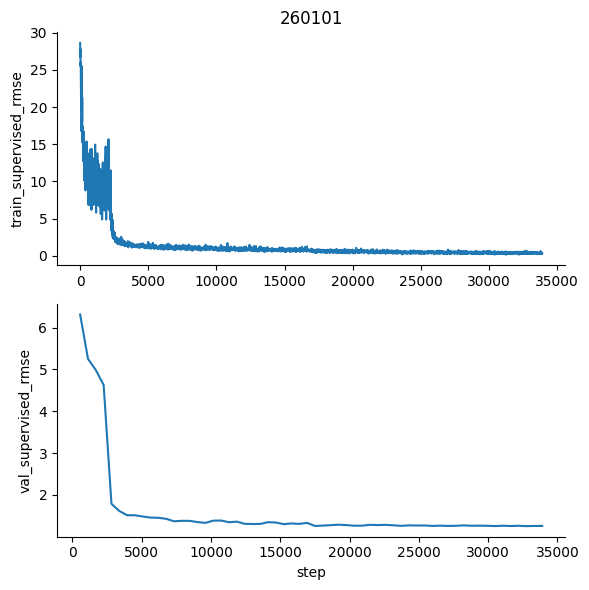

In [11]:
# Supervised metrics
fig, axs = plt.subplots(len(supervised_metrics), 1, figsize=(6, 3*len(supervised_metrics)))
model_name = model_names[0]
df = model_dfs[model_name]
for me, metric in enumerate(supervised_metrics):
    df_metric = df[df.tag == metric]
    # Plot trace
    axs[me].plot(df_metric.step, df_metric.value)
    # Remove upper and right boundary
    axs[me].spines['top'].set_visible(False)
    axs[me].spines['right'].set_visible(False)
    if me == 0:
        axs[me].set_title(model_name)
    if me == len(supervised_metrics) - 1:
        axs[me].set_xlabel("step")
    axs[me].set_ylabel(metric)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(save_dir, "supervised_loss.png"))

In [ ]:
# Unsupervised_metrics
fig, axs = plt.subplots(len(unsupervised_metrics), 1, figsize=(6, 3*len(unsupervised_metrics)))
model_name = model_names[0]
df = model_dfs[model_name]
for me, metric in enumerate(unsupervised_metrics):
    # Check if the current model has this metric
    if sum(df.tag == metric) > 0:
        # Access metric data
        df_metric = df[df.tag == metric]
        # Plot trace
        axs[me].plot(df_metric.step, df_metric.value)
    else:
        axs[me].text(0.4, 0.5, 'Not available', fontsize=12, color='black')
    # Remove upper and right boundary
    axs[me].spines['top'].set_visible(False)
    axs[me].spines['right'].set_visible(False)
    if me == 0:
        axs[me].set_title(model_name)
    if me == len(unsupervised_metrics) - 1:
        axs[me].set_xlabel("step")
    axs[me].set_ylabel(metric)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(save_dir, "unsupervised_loss.png"))

In [ ]:
fig, axs = plt.subplots(len(total_metrics), 1, figsize=(6, 3*len(total_metrics)))


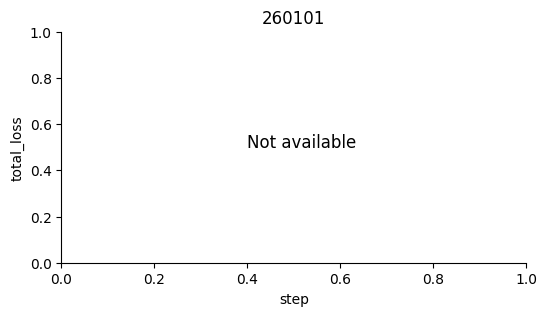

In [9]:
# Total_metrics
fig, ax = plt.subplots(len(total_metrics), 1, figsize=(6, 3*len(total_metrics)))
model_name = model_names[0]
df = model_dfs[model_name]
for me, metric in enumerate(total_metrics):
    # Check if the current model has this metric
    if sum(df.tag == metric) > 0:
        # Access metric data
        df_metric = df[df.tag == metric]
        # Plot trace
        ax.plot(df_metric.step, df_metric.value)
    else:
        ax.text(0.4, 0.5, 'Not available', fontsize=12, color='black')
    # Remove upper and right boundary
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(model_name)
    ax.set_xlabel("step")
    ax.set_ylabel(metric)

# Save the figure
plt.savefig(os.path.join(save_dir, "total_loss.png"))

## Multiple models

### Plot training results

In [ ]:
# Supervised metrics
fig, axs = plt.subplots(len(supervised_metrics), len(model_names), figsize=(5*len(model_names), 3*len(supervised_metrics)), sharey=True)
for mo, (model_dir, model_name) in enumerate(zip(model_dirs, model_names)):
    df = model_dfs[model_name]
    for me, metric in enumerate(supervised_metrics):
        df_metric = df[df.tag == metric]
        # Plot trace
        axs[me, mo].plot(df_metric.step, df_metric.value)
        # Remove upper and right boundary
        axs[me, mo].spines['top'].set_visible(False)
        axs[me, mo].spines['right'].set_visible(False)
        if me == 0:
            axs[me, mo].set_title(model_name)
        if me == len(supervised_metrics) - 1:
            axs[me, mo].set_xlabel("step")
        if mo == 0:
            axs[me, mo].set_ylabel(metric)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(save_dir, "supervised_loss.png"))


In [ ]:
# Unsupervised_metrics
fig, axs = plt.subplots(len(unsupervised_metrics), len(model_names), figsize=(5*len(model_names), 3*len(unsupervised_metrics)))
for mo, (model_dir, model_name) in enumerate(zip(model_dirs, model_names)):
    df = model_dfs[model_name]
    for me, metric in enumerate(unsupervised_metrics):
        # Check if the current model has this metric
        if sum(df.tag == metric) > 0:
            # Access metric data
            df_metric = df[df.tag == metric]
            # Plot trace
            axs[me, mo].plot(df_metric.step, df_metric.value)
        else:
            axs[me, mo].text(0.4, 0.5, 'Not available', fontsize=12, color='black')
        # Remove upper and right boundary
        axs[me, mo].spines['top'].set_visible(False)
        axs[me, mo].spines['right'].set_visible(False)
        if me == 0:
            axs[me, mo].set_title(model_name)
        if me == len(unsupervised_metrics) - 1:
            axs[me, mo].set_xlabel("step")
        if mo == 0:
            axs[me, mo].set_ylabel(metric)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(save_dir, "unsupervised_loss.png"))

In [ ]:
# Total_metrics
fig, axs = plt.subplots(len(total_metrics), len(model_names), figsize=(5*len(model_names), 3*len(total_metrics)))
for mo, (model_dir, model_name) in enumerate(zip(model_dirs, model_names)):
    df = model_dfs[model_name]
    for me, metric in enumerate(total_metrics):
        # Check if the current model has this metric
        if sum(df.tag == metric) > 0:
            # Access metric data
            df_metric = df[df.tag == metric]
            # Plot trace
            axs[mo].plot(df_metric.step, df_metric.value)
        else:
            axs[mo].text(0.4, 0.5, 'Not available', fontsize=12, color='black')
        # Remove upper and right boundary
        axs[mo].spines['top'].set_visible(False)
        axs[mo].spines['right'].set_visible(False)
        if me == 0:
            axs[mo].set_title(model_name)
        if me == len(unsupervised_metrics) - 1:
            axs[mo].set_xlabel("step")
        if mo == 0:
            axs[mo].set_ylabel(metric)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig(os.path.join(save_dir, "total_loss.png"))